## **Introduction**:

Polycystic Ovary Syndrome (PCOS) is one of the most common hormonal disorders affecting women of reproductive age. It often goes undiagnosed for years due to its wide range of symptoms and the absence of a single, clear diagnostic test. Early detection is crucial, as untreated PCOS can lead to serious health issues like infertility, diabetes, and heart disease. With the growing availability of medical data, machine learning offers a promising approach to assist in the early and accurate detection of PCOS.

### Problem Statement:

The goal of this project is to develop a machine learning model that can accurately predict the likelihood of a woman having PCOS based on clinical and diagnostic features. By identifying patterns in patient data, the model aims to support healthcare professionals in making quicker and more reliable diagnostic decisions, potentially improving patient outcomes and reducing the time to diagnosis.

In [2]:
#Import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load data:

from google.colab import files
uploaded= files.upload()


Saving PCOS_infertility.csv to PCOS_infertility.csv


In [4]:
df_winf = pd.read_csv("PCOS_infertility.csv")

In [5]:
from google.colab import files
uploaded= files.upload()

Saving PCOS_data_without_infertility.xlsx to PCOS_data_without_infertility.xlsx


In [6]:
df_woinf = pd.read_excel("PCOS_data_without_infertility.xlsx",sheet_name="Full_new")

In [7]:
#Viewing data of infertile patients:
df_winf.head()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


In [8]:
#Looking at the columns of data of infertile patients.
df_winf.columns.to_list()

['Sl. No',
 'Patient File No.',
 'PCOS (Y/N)',
 '  I   beta-HCG(mIU/mL)',
 'II    beta-HCG(mIU/mL)',
 'AMH(ng/mL)']

In [9]:
#Viewing data of non-infertile patients:
df_woinf.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [10]:
#Look at the columns of data with non-infertile patients.
df_woinf.columns.to_list()

['Sl. No',
 'Patient File No.',
 'PCOS (Y/N)',
 ' Age (yrs)',
 'Weight (Kg)',
 'Height(Cm) ',
 'BMI',
 'Blood Group',
 'Pulse rate(bpm) ',
 'RR (breaths/min)',
 'Hb(g/dl)',
 'Cycle(R/I)',
 'Cycle length(days)',
 'Marraige Status (Yrs)',
 'Pregnant(Y/N)',
 'No. of aborptions',
 '  I   beta-HCG(mIU/mL)',
 'II    beta-HCG(mIU/mL)',
 'FSH(mIU/mL)',
 'LH(mIU/mL)',
 'FSH/LH',
 'Hip(inch)',
 'Waist(inch)',
 'Waist:Hip Ratio',
 'TSH (mIU/L)',
 'AMH(ng/mL)',
 'PRL(ng/mL)',
 'Vit D3 (ng/mL)',
 'PRG(ng/mL)',
 'RBS(mg/dl)',
 'Weight gain(Y/N)',
 'hair growth(Y/N)',
 'Skin darkening (Y/N)',
 'Hair loss(Y/N)',
 'Pimples(Y/N)',
 'Fast food (Y/N)',
 'Reg.Exercise(Y/N)',
 'BP _Systolic (mmHg)',
 'BP _Diastolic (mmHg)',
 'Follicle No. (L)',
 'Follicle No. (R)',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)',
 'Endometrium (mm)',
 'Unnamed: 44']

The files were divided into infertility and without-infertility patients.We would have to combine the 2 datasets tby patient file no ,delete repeated features and change PCOS(Y/N) to Target.

In [11]:
#Merging the files:
pcos_df = pd.merge(df_woinf,df_winf, on='Patient File No.', suffixes=('','_wo'),how='left')
pcos_df

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44,Sl. No_wo,PCOS (Y/N)_wo,I beta-HCG(mIU/mL)_wo,II beta-HCG(mIU/mL)_wo,AMH(ng/mL)_wo
0,1,1,0,28,44.6,152.000,19.300000,15,78,22,...,3,18.0,18.0,8.5,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,0,36,65.0,161.500,24.921163,15,74,20,...,5,15.0,14.0,3.7,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,1,33,68.8,165.000,25.270891,11,72,18,...,15,18.0,20.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,0,37,65.0,148.000,29.674945,13,72,20,...,2,15.0,14.0,7.5,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,0,25,52.0,161.000,20.060954,11,72,18,...,4,16.0,14.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.500000,17,72,16,...,0,17.5,10.0,6.7,NaN,NaN,NaN,NaN,NaN,NaN
537,538,538,0,30,63.2,158.000,25.300000,15,72,18,...,7,19.0,18.0,8.2,NaN,NaN,NaN,NaN,NaN,NaN
538,539,539,0,36,54.0,152.000,23.400000,13,74,20,...,0,18.0,9.0,7.3,NaN,NaN,NaN,NaN,NaN,NaN
539,540,540,0,27,50.0,150.000,22.200000,15,74,20,...,6,18.0,16.0,11.5,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Dropping repeated features:

pcos_df =pcos_df.drop(['Unnamed: 44', 'Sl. No_wo', 'PCOS (Y/N)_wo', '  I   beta-HCG(mIU/mL)_wo',
       'II    beta-HCG(mIU/mL)_wo', 'AMH(ng/mL)_wo'], axis=1)

In [13]:
#Changing the title of the properties
pcos_df = pcos_df.rename(columns = {"PCOS (Y/N)":"Target"})

In [17]:
#Dropping Unnecessary features:
pcos_df = pcos_df.drop(["Sl. No","Patient File No."],axis = 1)

In [14]:
#Final View of the merged dataset:
pcos_df.head()

,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [18]:
#Getting Info about the data variables:
pcos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Target                  541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of aborptions       541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

Here we observes some b=variables inspite of being numeric are saved as object or string variables, we shall convert them to numeric variables:


In [19]:
#Encoding categorical variables (dtype objects)
pcos_df["AMH(ng/mL)"] = pd.to_numeric(pcos_df["AMH(ng/mL)"], errors='coerce')
pcos_df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(pcos_df["II    beta-HCG(mIU/mL)"], errors='coerce')

In [20]:
#trimming column names where there are extra spaces at start and end
pcos_df = pcos_df.rename(columns=lambda x: x.strip())

#### Data Cleaning and Maniplulation

In [21]:
#Checking for duplicates:
pcos_df.duplicated().sum()

np.int64(0)

In [22]:
#Checking for null values:
pcos_df.isnull().sum()

,0
Target,0
Age (yrs),0
Weight (Kg),0
Height(Cm),0
BMI,0
Blood Group,0
Pulse rate(bpm),0
RR (breaths/min),0
Hb(g/dl),0
Cycle(R/I),0


There are very few missing values. Lets fill those with e median values of the respective columns:


In [23]:
#Filling missing values with the median value of the features.

pcos_df['Marraige Status (Yrs)'].fillna(pcos_df['Marraige Status (Yrs)'].median(),inplace=True)
pcos_df['II    beta-HCG(mIU/mL)'].fillna(pcos_df['II    beta-HCG(mIU/mL)'].median(),inplace=True)
pcos_df['AMH(ng/mL)'].fillna(pcos_df['AMH(ng/mL)'].median(),inplace=True)
pcos_df['Fast food (Y/N)'].fillna(pcos_df['Fast food (Y/N)'].median(),inplace=True)

In [20]:
#Replacing the blood group codes with actual blood group:
pcos_df['Blood Group'] = pcos_df['Blood Group'].replace({
    11: 'A+',
    12: 'A-',
    13: 'B+',
    14: 'B-',
    15: 'O+',
    16: 'O-',
    17: 'AB+',
    18: 'AB-'
})

pcos_df.head()

,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.300000,O+,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.921163,O+,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.270891,A+,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.674945,B+,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.060954,A+,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [24]:
#checking for outliers:

import pandas as pd

def detect_outliers_iqr(pcos_df):
    outlier_summary = {}

    numeric_cols = pcos_df.select_dtypes(include='number')

    for col in numeric_cols:
        Q1 = pcos_df[col].quantile(0.25)
        Q3 = pcos_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outliers = pcos_df[(pcos_df[col] < lower) | (pcos_df[col] > upper)]
        outlier_summary[col] = len(outliers)

    return pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier Count'])

# Usage
outliers_report = detect_outliers_iqr(pcos_df)
print(outliers_report.sort_values(by='Outlier Count', ascending=False))


                        Outlier Count
Reg.Exercise(Y/N)                 134
No. of aborptions                 104
Pulse rate(bpm)                    94
II    beta-HCG(mIU/mL)             78
Cycle length(days)                 77
AMH(ng/mL)                         52
FSH/LH                             48
I   beta-HCG(mIU/mL)               46
PRG(ng/mL)                         39
Vit D3 (ng/mL)                     31
RBS(mg/dl)                         30
TSH (mIU/L)                        27
LH(mIU/mL)                         24
PRL(ng/mL)                         21
Hip(inch)                          21
Weight (Kg)                        18
Waist(inch)                        17
RR (breaths/min)                   14
BMI                                12
FSH(mIU/mL)                        12
Marraige Status (Yrs)              11
Avg. F size (L) (mm)                9
Endometrium (mm)                    8
Hb(g/dl)                            8
Height(Cm)                          6
Follicle No.

### Univariate Variable Analysis – Description

Here I performed univariate analysis to explore the individual distribution and behavior of selected variables in the dataset. From the total of 44 variables, we focused on a subset that includes both categorical and numerical features relevant to **lifestyle and demographic characteristics**.

1) Categorical Variable : Target, Pregnant(Y/N), Weight gain(Y/N), hair growth(Y/N), Skin darkening (Y/N), Hair loss(Y/N), Pimples(Y/N), Fast food (Y/N), Reg.Exercise(Y/N), Blood Group

2)Numerical Variable : Age (yrs), Weight (Kg),Marraige Status (Yrs)...

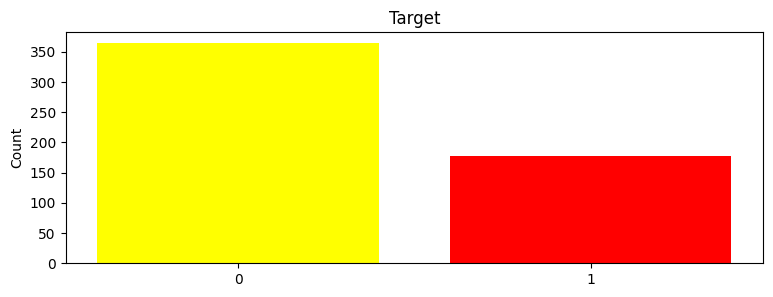

Target: 
 Target
0    364
1    177
Name: count, dtype: int64


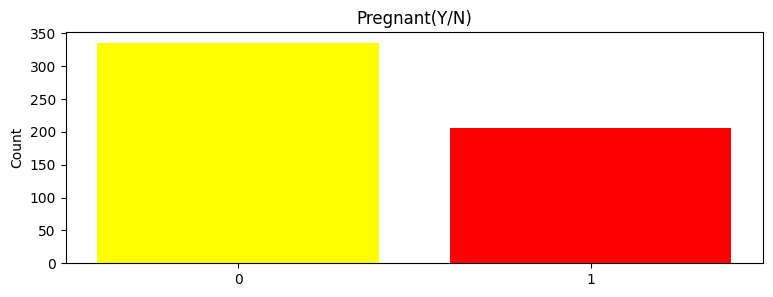

Pregnant(Y/N): 
 Pregnant(Y/N)
0    335
1    206
Name: count, dtype: int64


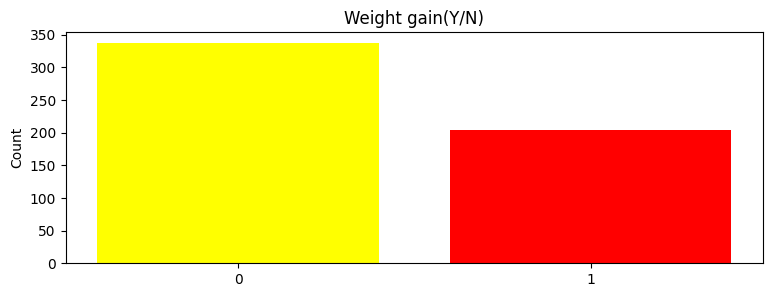

Weight gain(Y/N): 
 Weight gain(Y/N)
0    337
1    204
Name: count, dtype: int64


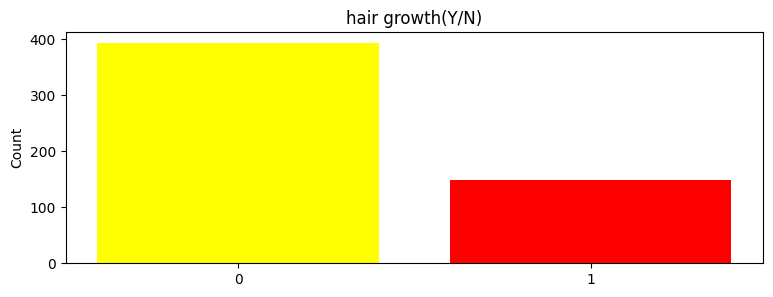

hair growth(Y/N): 
 hair growth(Y/N)
0    393
1    148
Name: count, dtype: int64


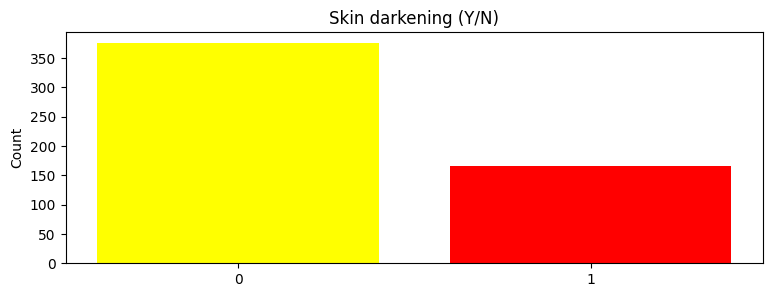

Skin darkening (Y/N): 
 Skin darkening (Y/N)
0    375
1    166
Name: count, dtype: int64


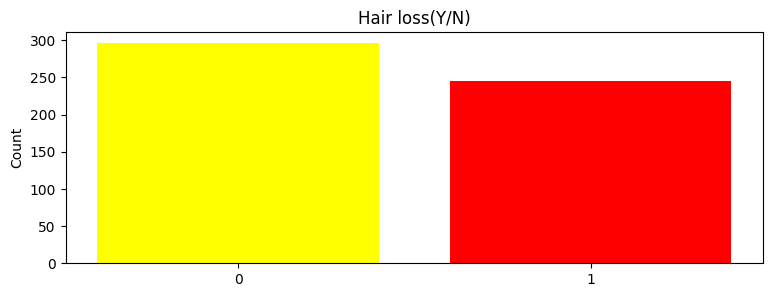

Hair loss(Y/N): 
 Hair loss(Y/N)
0    296
1    245
Name: count, dtype: int64


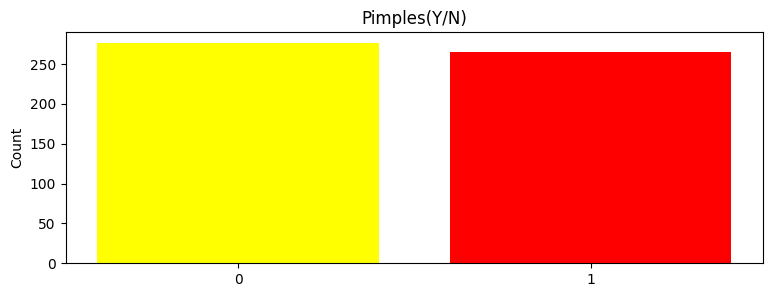

Pimples(Y/N): 
 Pimples(Y/N)
0    276
1    265
Name: count, dtype: int64


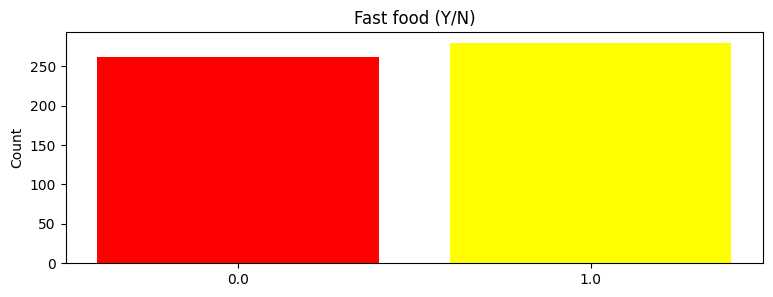

Fast food (Y/N): 
 Fast food (Y/N)
1.0    279
0.0    262
Name: count, dtype: int64


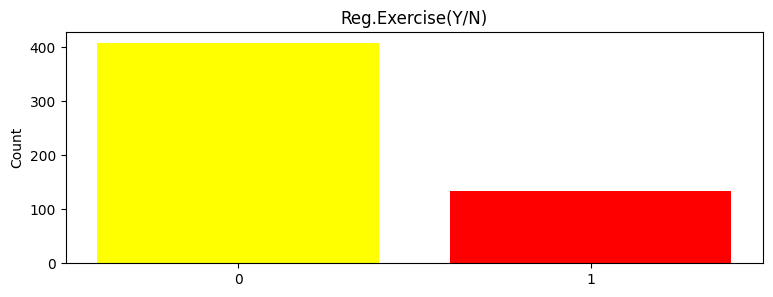

Reg.Exercise(Y/N): 
 Reg.Exercise(Y/N)
0    407
1    134
Name: count, dtype: int64


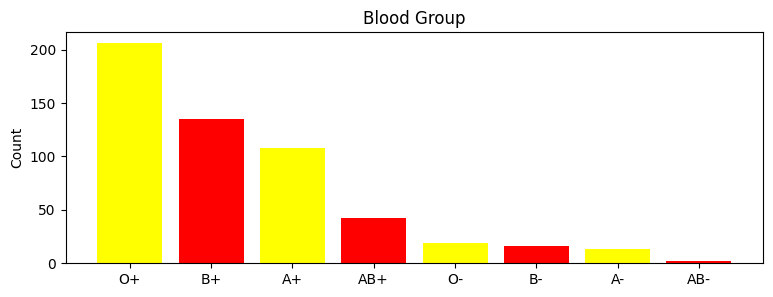

Blood Group: 
 Blood Group
O+     206
B+     135
A+     108
AB+     42
O-      19
B-      16
A-      13
AB-      2
Name: count, dtype: int64


In [22]:
# count for different categorical features
def bar_plot(variable):
    """
     input: variable example : Target
     output: bar plot & value count

    """
    #get feature
    var = pcos_df[variable]
    #count number of categorical variable(value/sample)
    varValue = var.value_counts()
    #visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index,varValue,color=['yellow','red'])
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Count")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))



#Putting the categorical features together in 'category'
category = ["Target", "Pregnant(Y/N)", "Weight gain(Y/N)", "hair growth(Y/N)", "Skin darkening (Y/N)", "Hair loss(Y/N)",
            "Pimples(Y/N)", "Fast food (Y/N)", "Reg.Exercise(Y/N)", "Blood Group"]
for c in category:
    bar_plot(c)

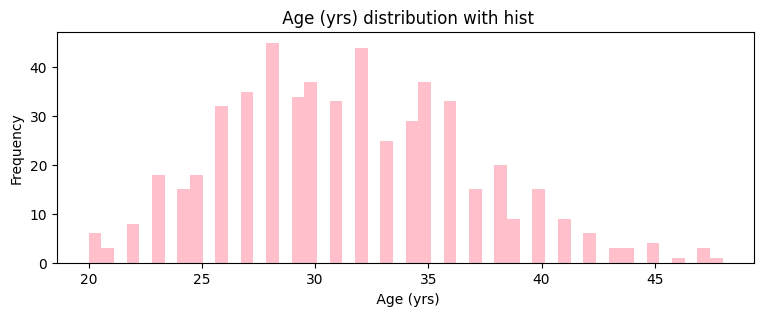

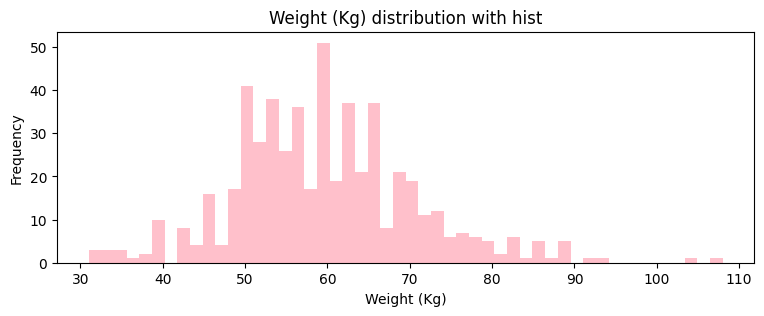

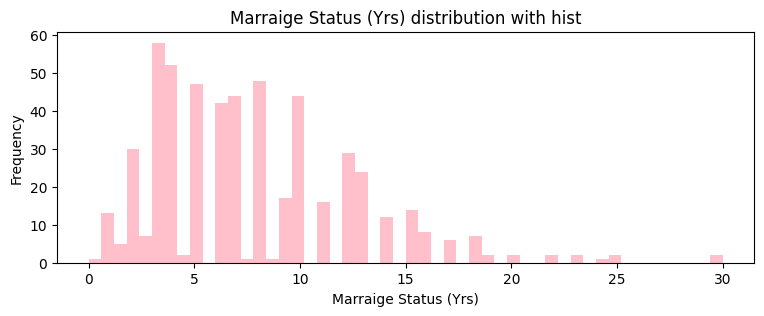

In [88]:
# count for different numeric features:

def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(pcos_df[variable], bins = 50,color='pink')
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()


numericVar = [" Age (yrs)", "Weight (Kg)","Marraige Status (Yrs)"]
for n in numericVar:
    plot_hist(n)

### Exploratory Data Analysis:

In [30]:
pcos_df.describe()

,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,11.160037,2.560074,...,0.489834,0.515712,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,0.866904,0.901950,...,0.500359,0.500216,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,11.000000,2.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,11.700000,4.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


1) Patterns of Length of the Menstrual Cycle

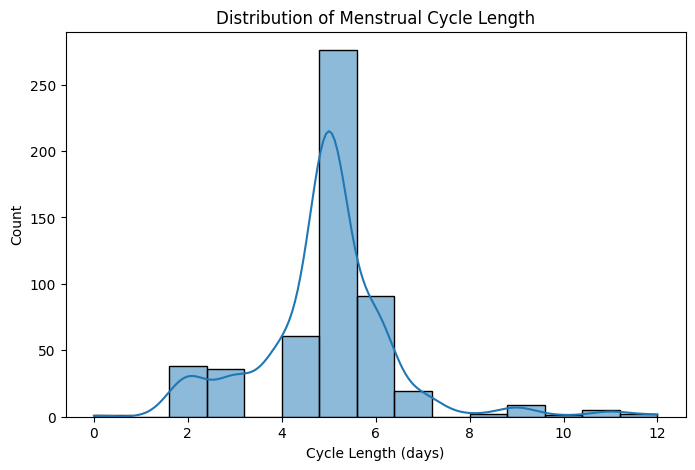

In [36]:

plt.figure(figsize=(8, 5))
sns.histplot(pcos_df['Cycle length(days)'], bins=15, kde=True)
plt.title('Distribution of Menstrual Cycle Length')
plt.xlabel('Cycle Length (days)')
plt.ylabel('Count')
plt.show()


2) Patterns of BMI:

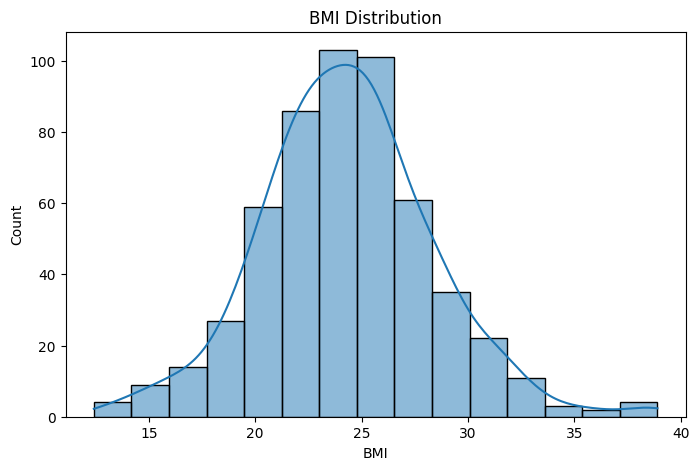

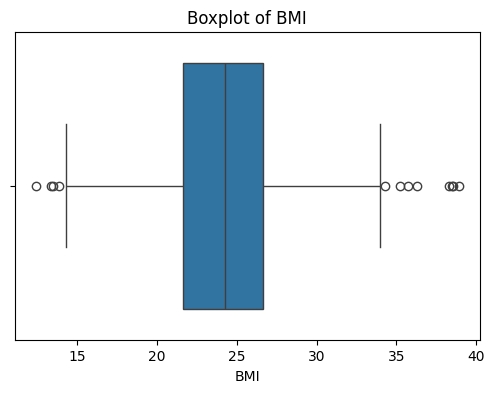

In [38]:
plt.figure(figsize=(8, 5))
sns.histplot(pcos_df['BMI'], bins=15, kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

# Boxplot to spot outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=pcos_df['BMI'])
plt.title('Boxplot of BMI')
plt.show()


3. Patterns of Irregularity in Menstruation:

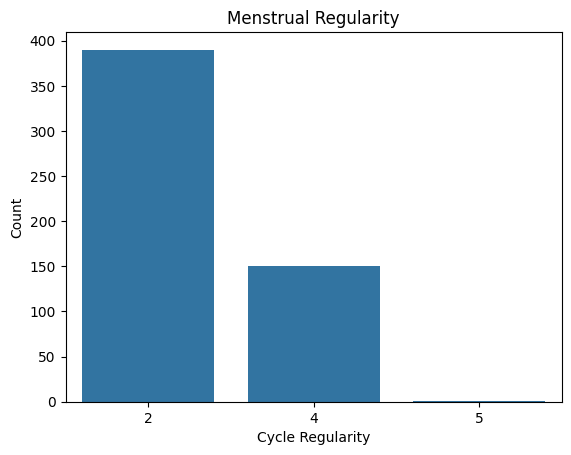

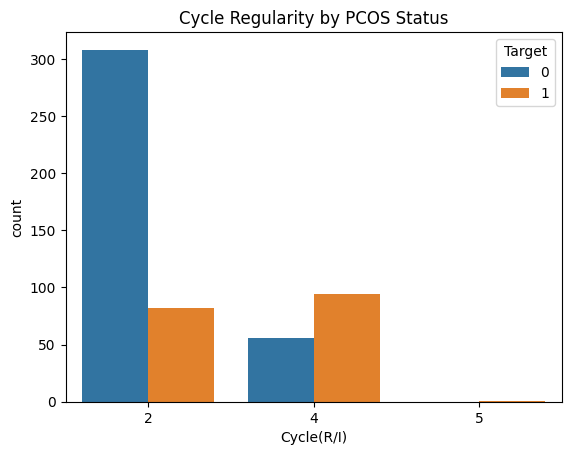

In [42]:
# Countplot
sns.countplot(x='Cycle(R/I)', data=pcos_df)
plt.title('Menstrual Regularity')
plt.xlabel('Cycle Regularity')
plt.ylabel('Count')
plt.show()

# Proportion by PCOS status
sns.countplot(x='Cycle(R/I)', hue='Target', data=pcos_df)
plt.title('Cycle Regularity by PCOS Status')
plt.show()


4) Number of Follicles (Left and Right Ovary)

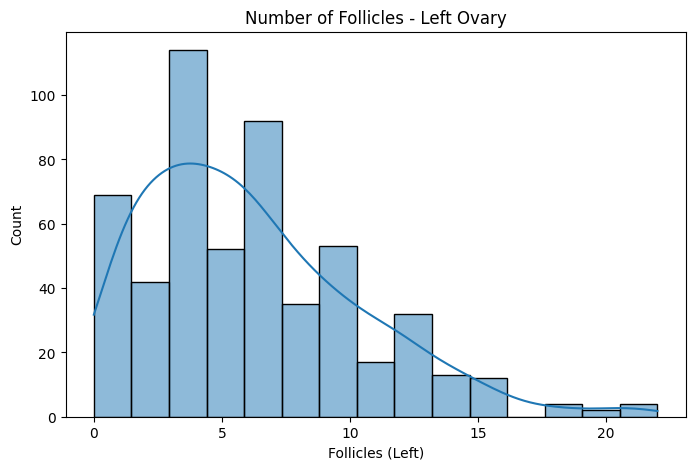

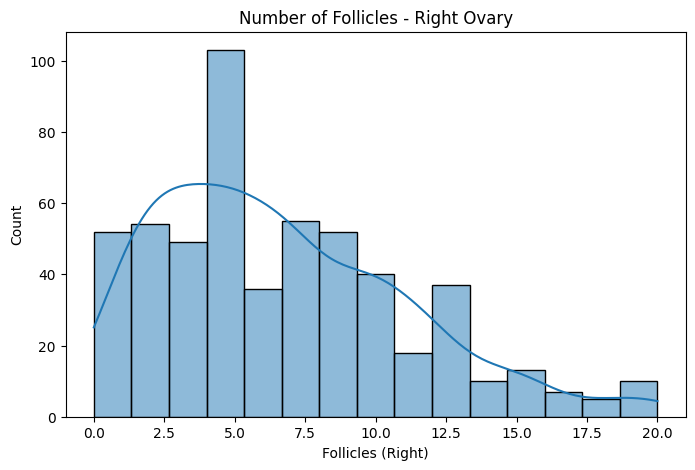

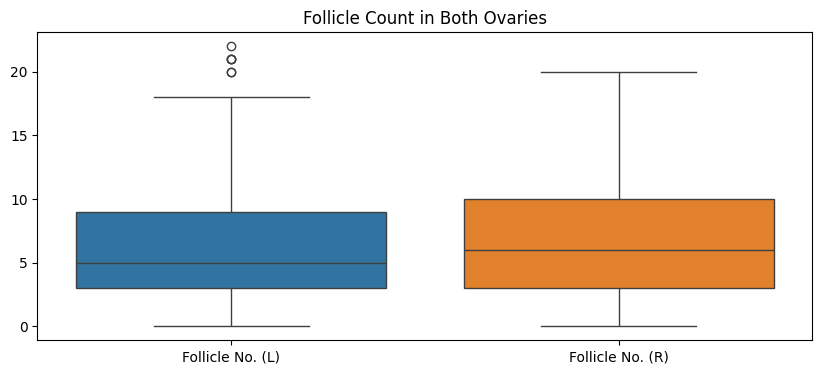

In [43]:
# Distribution for Left Ovary
plt.figure(figsize=(8, 5))
sns.histplot(pcos_df['Follicle No. (L)'], bins=15, kde=True)
plt.title('Number of Follicles - Left Ovary')
plt.xlabel('Follicles (Left)')
plt.ylabel('Count')
plt.show()

# Distribution for Right Ovary
plt.figure(figsize=(8, 5))
sns.histplot(pcos_df['Follicle No. (R)'], bins=15, kde=True)
plt.title('Number of Follicles - Right Ovary')
plt.xlabel('Follicles (Right)')
plt.ylabel('Count')
plt.show()

# Boxplots side by side
plt.figure(figsize=(10, 4))
sns.boxplot(data=pcos_df[['Follicle No. (L)', 'Follicle No. (R)']])
plt.title('Follicle Count in Both Ovaries')
plt.show()


5)  Bar Plot of Symptoms vs PCOS (Side-by-Side Comparison)

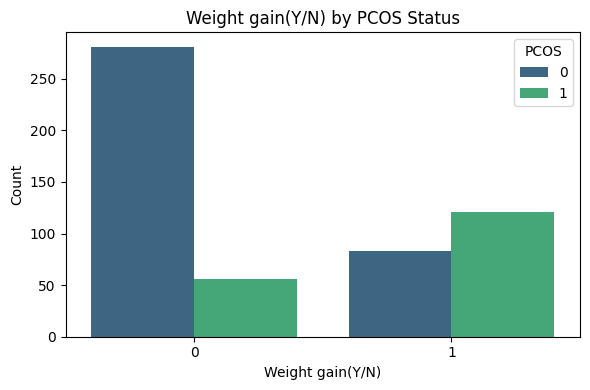

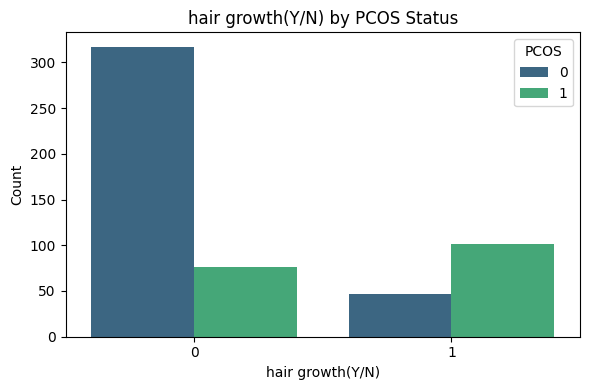

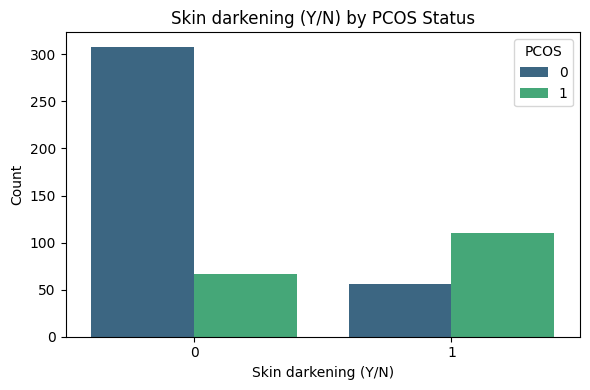

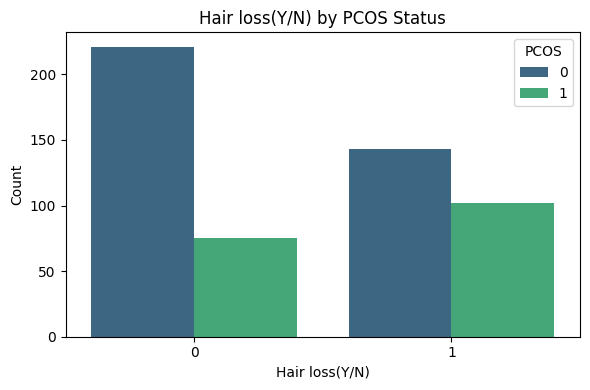

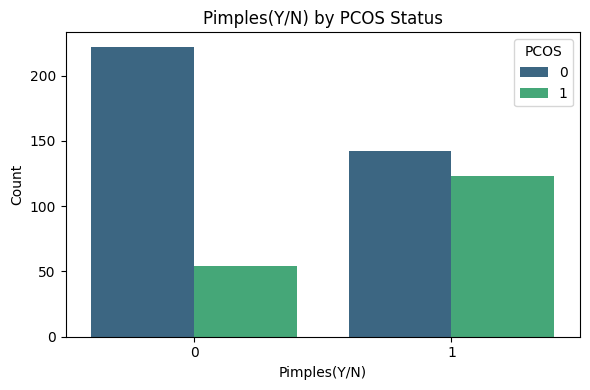

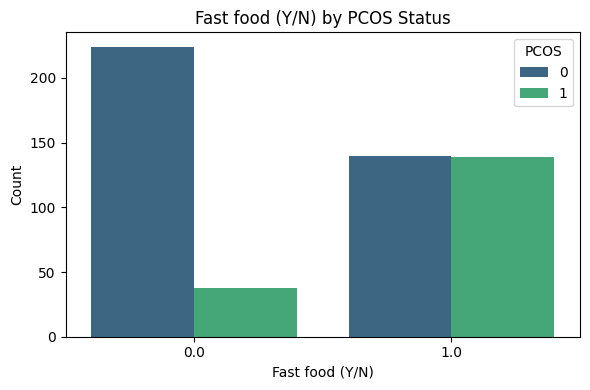

In [46]:
symptom_cols = ['Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
                'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)']

for col in symptom_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='Target',palette='viridis', data=pcos_df)
    plt.title(f'{col} by PCOS Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='PCOS')
    plt.tight_layout()
    plt.show()


In [ ]:
6) Bar Plot of Blood Group Distribution Among PCOS vs Non-PCOS

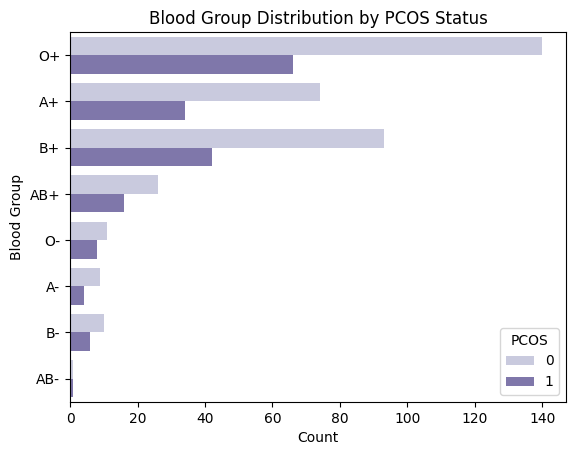

In [51]:
sns.countplot(y='Blood Group', hue='Target', palette='Purples',data=pcos_df)
plt.title('Blood Group Distribution by PCOS Status')
plt.ylabel('Blood Group')
plt.xlabel('Count')
plt.legend(title='PCOS')
plt.show()


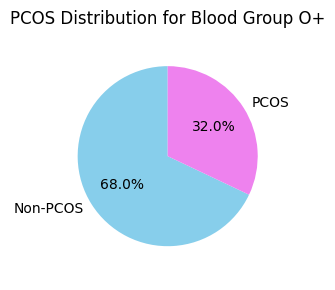

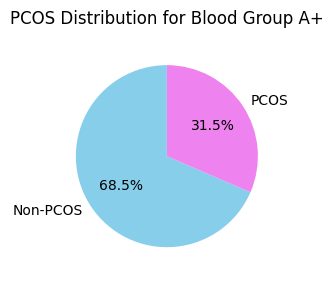

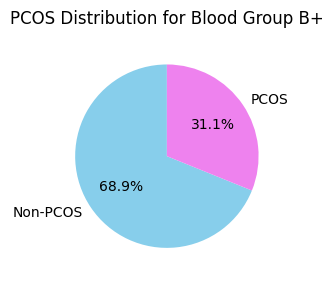

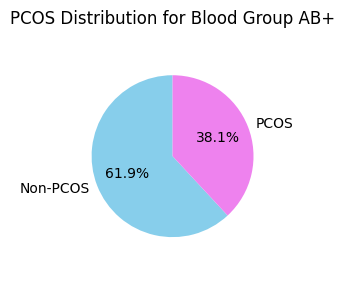

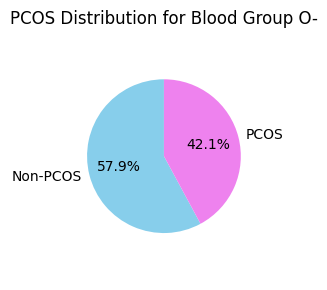

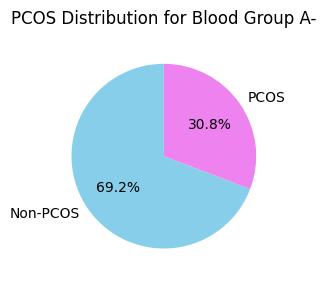

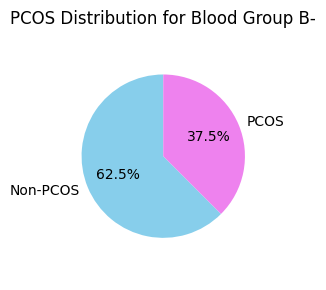

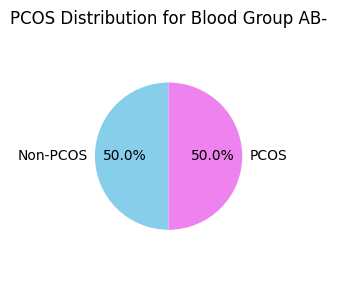

In [58]:
#For each Blood Group (e.g., A+, B−, O+, etc.), showing pie chart of the PCOS distribution (Yes/No) within that blood group.

# Get unique blood groups
blood_groups = pcos_df['Blood Group'].dropna().unique()

# Loop over each blood group
for group in blood_groups:
    # Subset data for this blood group
    subset = pcos_df[pcos_df['Blood Group'] == group]

    # Count how many have PCOS (1) vs not (0)
    counts = subset['Target'].value_counts().sort_index()  # 0 = Non-PCOS, 1 = PCOS

    # Define labels
    labels = ['Non-PCOS', 'PCOS']

    # Make sure both 0 and 1 are present
    counts = counts.reindex([0, 1], fill_value=0)

    # Plot pie chart
    plt.figure(figsize=(3,3))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'violet'])
    plt.title(f'PCOS Distribution for Blood Group {group}')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()


 7) Age Group vs PCOS Count (Binned Bar Plot)

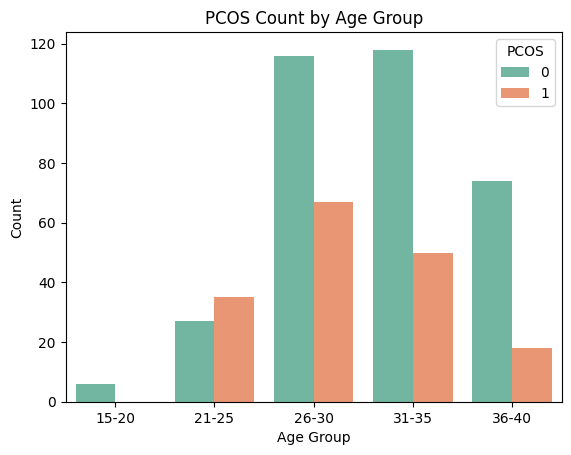

In [55]:
# Create age bins
pcos_df['Age Group'] = pd.cut(pcos_df[' Age (yrs)'], bins=[15, 20, 25, 30, 35, 40], labels=['15-20','21-25','26-30','31-35','36-40'])

sns.countplot(x='Age Group', hue='Target', data=pcos_df, palette='Set2')
plt.title('PCOS Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='PCOS')
plt.show()


8) Feature selection based on the correlation factor

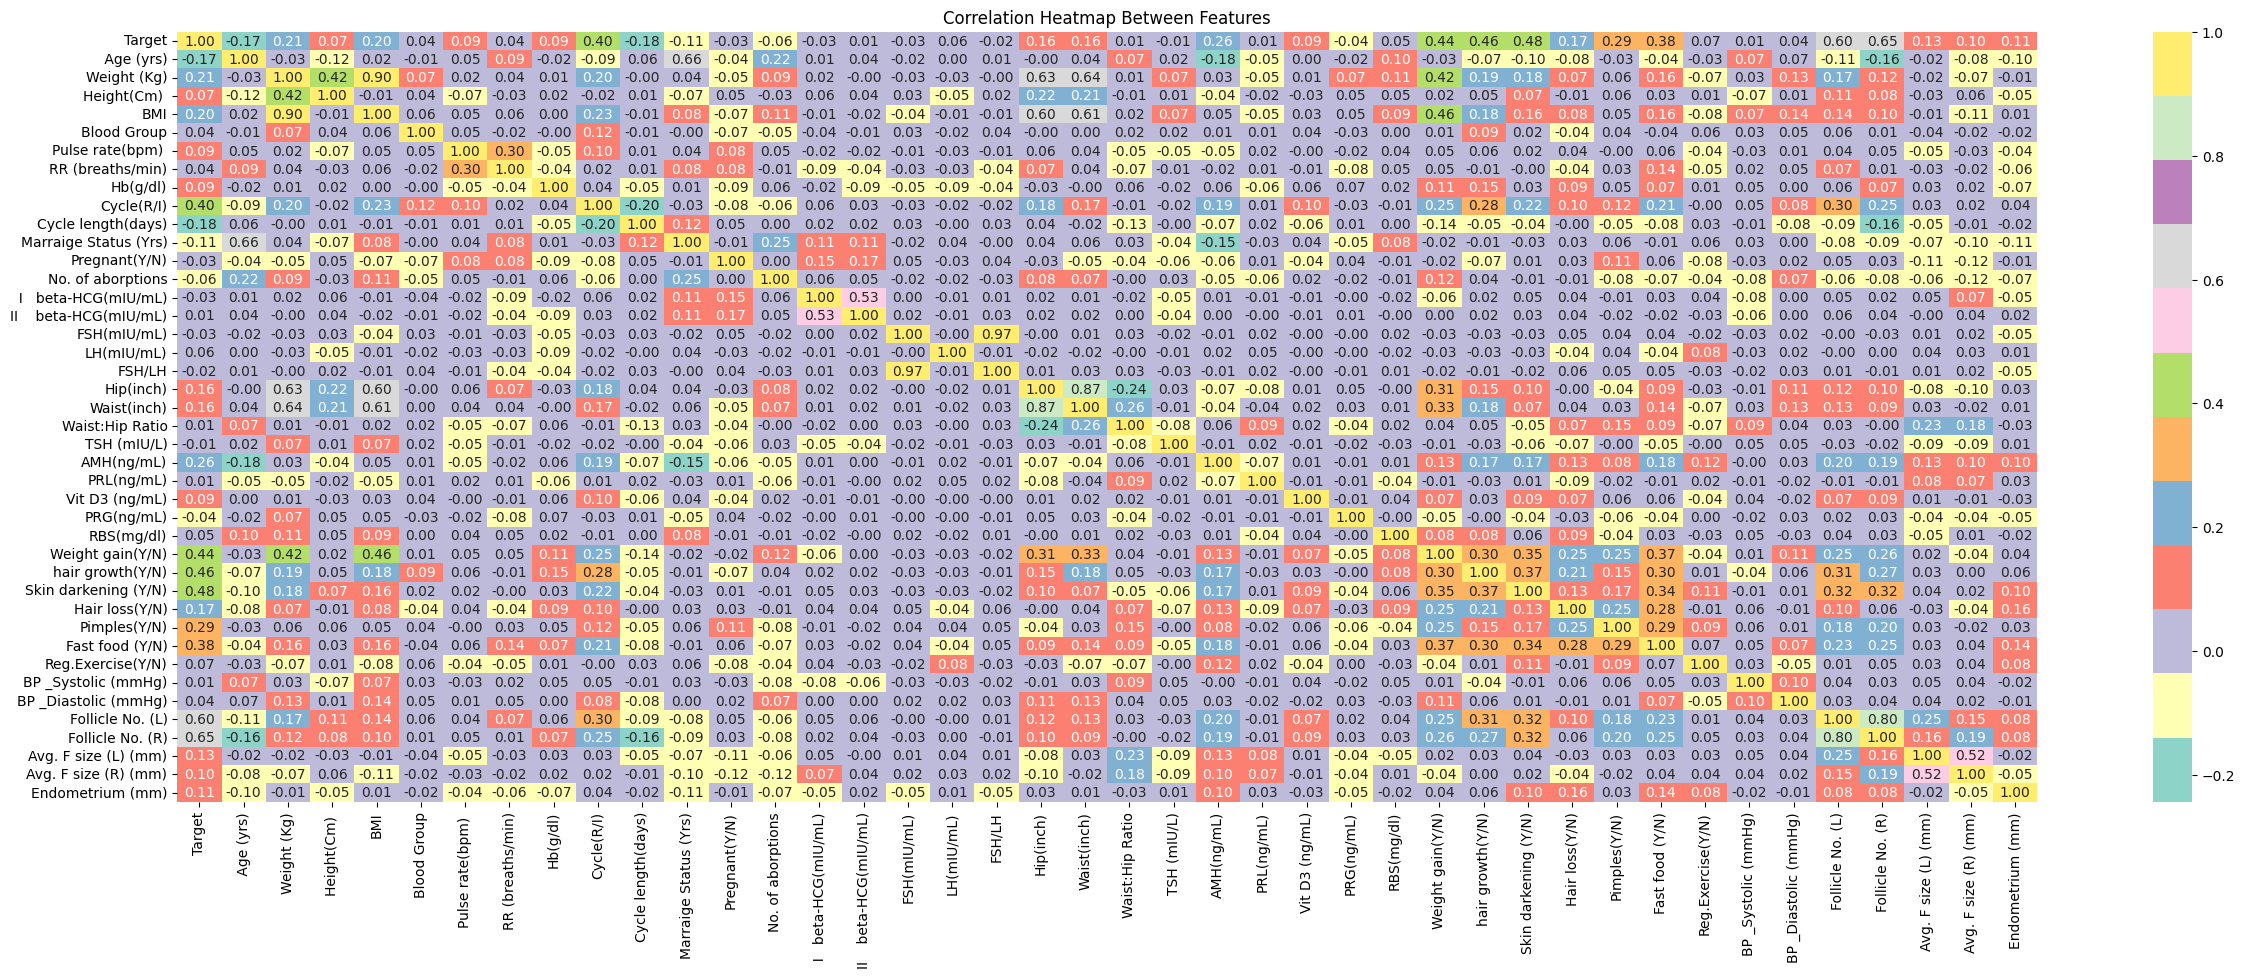

In [25]:
#Examining the correlation matrix of all features using a correlation heatmap.

#Replacing the blood group codes with numeric blood group:
pcos_df['Blood Group'] = pcos_df['Blood Group'].replace({
     'A+': 11,
    'A-': 12,
    'B+': 13,
    'B-': 14,
    'O+': 15,
    'O-': 16,
    'AB+': 17,
    'AB-': 18
})


#Plotting the heatmap
corr_matrix= pcos_df.corr()
plt.subplots(figsize=(30,10))
sns.heatmap(corr_matrix,cmap="Set3", annot = True, fmt = ".2f");
plt.title("Correlation Heatmap Between Features")
plt.show()

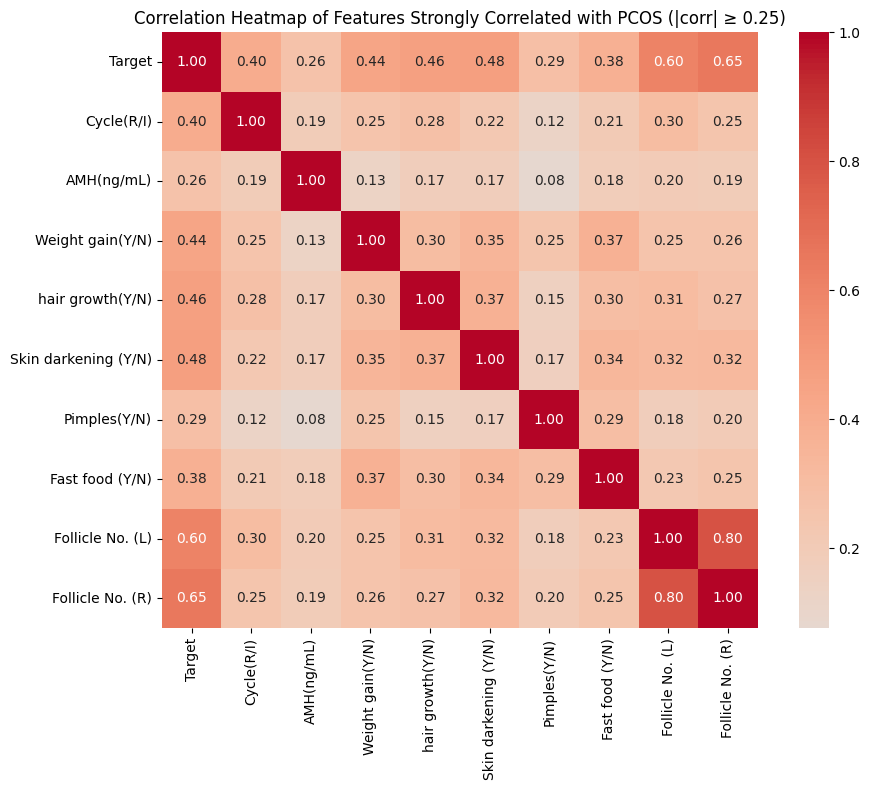

In [72]:

# Step 1: Correlation matrix for numeric columns only
corr_matrix = pcos_df.corr(numeric_only=True)

# Step 2: Select features where correlation with Target is ≥ 0.25
target_corr = corr_matrix['Target']
strong_features = target_corr[abs(target_corr) >= 0.25].index.tolist()

# Step 3: Subset the correlation matrix for just these features
filtered_corr = corr_matrix.loc[strong_features, strong_features]

# Step 4: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', center=0, fmt=".2f", square=True)
plt.title('Correlation Heatmap of Features Strongly Correlated with PCOS (|corr| ≥ 0.25)')
plt.tight_layout()
plt.show()


In [74]:
# Sort descending
strong_corr = strong_corr.sort_values(ascending=False)

# Display
print("Features with |correlation| ≥ 0.25 with PCOS Target:")
print(strong_corr)


Features with |correlation| ≥ 0.25 with PCOS Target:
Follicle No. (R)        0.648327
Follicle No. (L)        0.603346
Skin darkening (Y/N)    0.475733
hair growth(Y/N)        0.464667
Weight gain(Y/N)        0.441047
Cycle(R/I)              0.401644
Fast food (Y/N)         0.376183
Pimples(Y/N)            0.286077
AMH(ng/mL)              0.264141
Name: Target, dtype: float64


## **Modelling:**

In [46]:
#Importing all the required dependencies:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

In [26]:
#Splitting data into feature and target:
X = pcos_df.drop('Target', axis=1)
y = pcos_df['Target']

In [27]:
#Splitting data into train and testing data:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### *CLASSIFICATION USING LOGISTIC REGRESSION*

In [28]:
#Model fitting:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [29]:
#Model Predicting:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


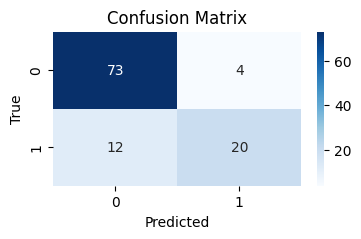


=== Evaluating the Logistic Model ===
Accuracy: 0.8532110091743119
Precision: 0.8333333333333334
Recall: 0.625
AUC: 0.9241071428571429


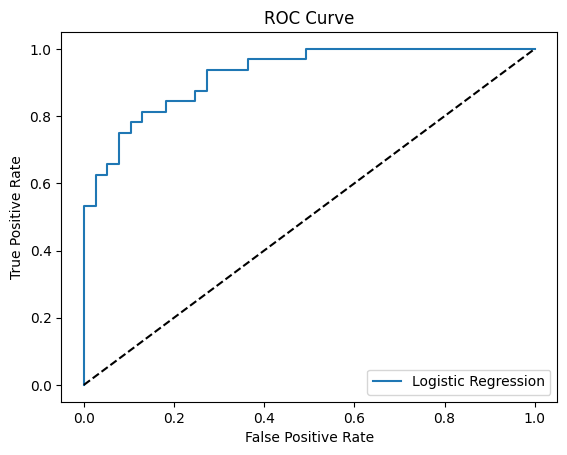

In [30]:
#Model Evaluation:

#Constructing the confusion matrix:
conf_matrix = confusion_matrix(y_test, y_pred)

#Plotting the confusion matrix:
plt.figure(figsize=(4,2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#Other Evaluation metrices:
print(f"\n=== Evaluating the Logistic Model ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

#AUC Score:
y_proba = logreg.predict_proba(X_test)[:, 1]
print("AUC:", roc_auc_score(y_test, y_proba))

#ROC Curve:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='Logistic Regression')

#Plotting the ROC curve:
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


**Metrics:**

Accuracy: 0.85 → The model correctly predicts 85% of the cases.

Precision: 0.83 → When the model predicts PCOS (positive class), it's correct 83% of the time.

Recall: 0.625 → It detects 62.5% of all actual PCOS cases.

AUC: 0.92 → Excellent ability to distinguish between PCOS and non-PCOS.

**ROC Curve:**

The ROC curve is quite high above the diagonal, indicating strong classification performance.

**Interpretation:**

Logistic Regression performs well overall.

However, its recall is moderate, meaning it's missing some actual PCOS cases.

Use this model when false positives are costlier than false negatives (i.e., you want high precision).


#### *CLASSIFICATION USING DECISION TREE MODEL:*

In [31]:
#Model Fitting:
dc_tree = DecisionTreeClassifier(random_state=42)
dc_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
#Model prediction:
y_pred = dc_tree.predict(X_test)
print('Accuracy of decion tree classifier on test set: {:.2f}'.format(dc_tree.score(X_test, y_test)))

Accuracy of decion tree classifier on test set: 0.83


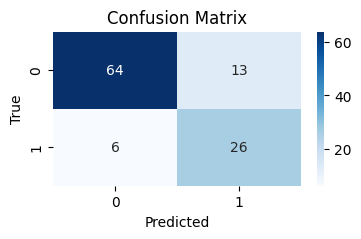


=== Evaluating the Decision Tree Model ===
Accuracy: 0.8256880733944955
Precision: 0.6666666666666666
Recall: 0.8125
AUC: 0.8218344155844156


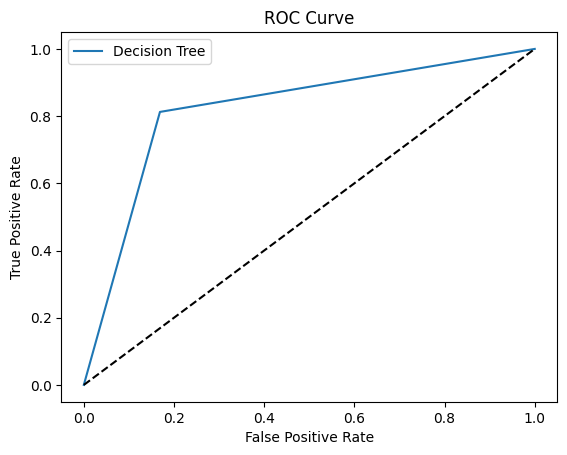

In [33]:
#Model Evaluation:

#Constructing the confusion matrix:
conf_matrix = confusion_matrix(y_test, y_pred)

#Plotting the confusion matrix:
plt.figure(figsize=(4,2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#Other Evaluation metrices:
print(f"\n=== Evaluating the Decision Tree Model ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

#AUC Score:
y_proba = dc_tree.predict_proba(X_test)[:, 1]
print("AUC:", roc_auc_score(y_test, y_proba))

#ROC Curve:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='Decision Tree')

#Plotting the ROC curve:
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


**Metrics:**

Accuracy: 0.826 → Slightly lower than Logistic Regression.

Precision: 0.667 → It’s correct 66.7% of the time when predicting PCOS.

Recall: 0.8125 → Good at identifying actual PCOS cases.

AUC: 0.82 → Still good, but lower than the others.

**ROC Curve:**

The curve is better than random but not as steep as Logistic or Random Forest.

**Interpretation:**

The model has high recall but lower precision, meaning it captures more true PCOS cases but also generates more false positives.

Suitable when identifying all possible PCOS cases is more important, even if a few false alarms are acceptable.

#### *CLASSIFICATION USING RANDOM FOREST MODEL:*

In [34]:
#Model Fitting:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [35]:
#Model prediction:
y_pred = rf_model.predict(X_test)
print('Accuracy of decion tree classifier on test set: {:.2f}'.format(rf_model.score(X_test, y_test)))

Accuracy of decion tree classifier on test set: 0.90


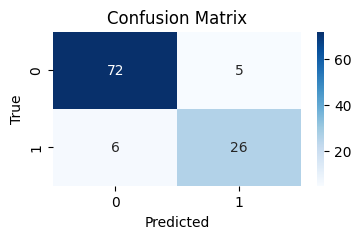


=== Evaluating the Random Forest Model ===
Accuracy: 0.8990825688073395
Precision: 0.8387096774193549
Recall: 0.8125
AUC: 0.9539366883116883


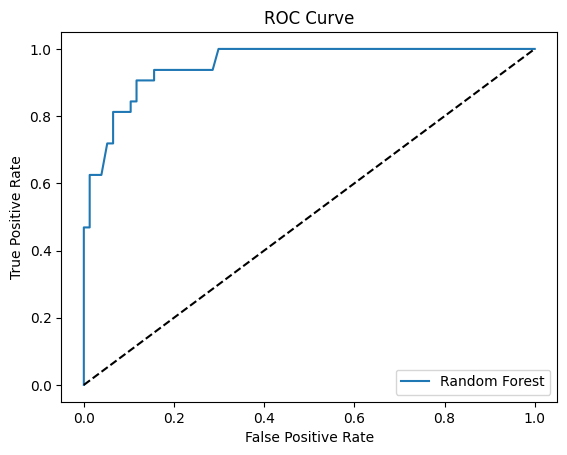

In [36]:
#Model Evaluation:

#Constructing the confusion matrix:
conf_matrix = confusion_matrix(y_test, y_pred)

#Plotting the confusion matrix:
plt.figure(figsize=(4,2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#Other Evaluation metrices:
print(f"\n=== Evaluating the Random Forest Model ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

#AUC Score:
y_proba = rf_model.predict_proba(X_test)[:, 1]
print("AUC:", roc_auc_score(y_test, y_proba))

#ROC Curve:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='Random Forest')

#Plotting the ROC curve:
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


**Metrics:**

Accuracy: 0.899 → Highest among all models.

Precision: 0.839 → Best at correctly identifying positive cases.

Recall: 0.8125 → High recall too.

AUC: 0.954 → Excellent distinction between classes.

**ROC Curve:**

The curve hugs the top-left corner, showing superior performance.

**Interpretation:**

Random Forest is the best-performing model overall:

High precision: Reliable when it predicts PCOS.

High recall: Rarely misses actual PCOS cases.

Balanced: Low bias and low variance.

Best suited for real-world deployment, especially when both precision and recall are important.



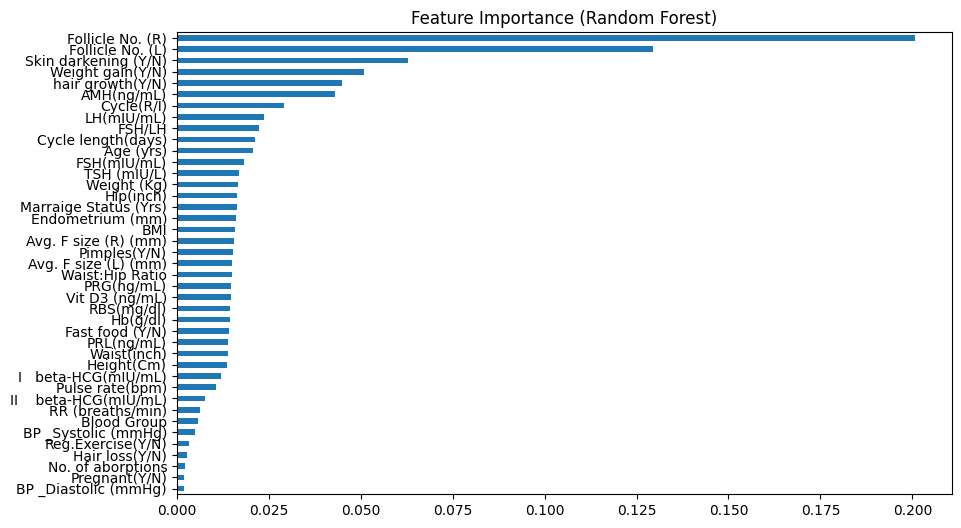

In [37]:
# Feature importance from Random Forest

importances = pd.Series(rf_model.feature_importances_, index=pcos_df.drop('Target', axis=1).columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6), title="Feature Importance (Random Forest)")
plt.show()

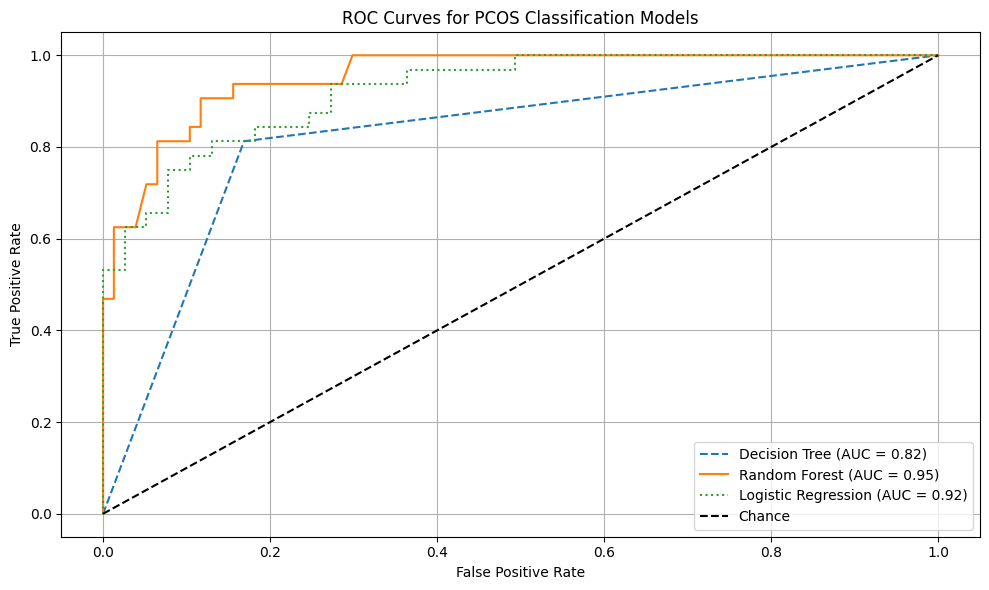

In [38]:
#Comapring ROC curves for 3 models:

# Predict probabilities
dt_probs = dc_tree.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]
log_probs = logreg.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)

# AUC scores
auc_dt = roc_auc_score(y_test, dt_probs)
auc_rf = roc_auc_score(y_test, rf_probs)
auc_log = roc_auc_score(y_test, log_probs)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', linestyle='--')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', linestyle='-')
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})', linestyle=':')

# Diagonal line (chance)
plt.plot([0, 1], [0, 1], 'k--', label='Chance')

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for PCOS Classification Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


**The Random Forest model outperforms the others across nearly all metrics and offers the best balance between detecting PCOS cases accurately (recall) and avoiding false positives (precision). It is well-suited for clinical applications, especially where decision support tools are needed.**

#### Making Prediction on New Input:

In [48]:

# New input data from user:
new_patient_data = {
    'Age (yrs)': 33.0,
    'Weight (Kg)':68.8,
    'Height(Cm)':165.0,
    'BMI':25.270891,
    'Blood Group':11,
    'Pulse rate(bpm)':72.0,
    'RR (breaths/min)':18.0,
    'Hb(g/dl)':11.80,
    'Cycle(R/I)':2.0,
    'Cycle length(days)':5,
    'Marraige Status (Yrs)':10,
    'Pregnant(Y/N)':1,
    'No. of aborptions':0,
    'I   beta-HCG(mIU/mL)':494.08,
    'II    beta-HCG(mIU/mL)':494.08,
    'FSH(mIU/mL)':5.54,
    'LH(mIU/mL)':0.88,
    'FSH/LH':4,
    'Hip(inch)':40,
    'Waist(inch)':36,
    'Waist:Hip Ratio':0.9,
    'TSH (mIU/L)':2.54,
    'AMH(ng/mL)':6.63,
    'PRL(ng/mL)':10.52,
    'Vit D3 (ng/mL)':49.7,
    'PRG(ng/mL)':0.36,
    'RBS(mg/dl)':84,
    'Weight gain(Y/N)':0,
    'hair growth(Y/N)':0,
    'Skin darkening (Y/N)':0,
    'Hair loss(Y/N)':1,
    'Pimples(Y/N)':1,
    'Fast food (Y/N)':1,
    'Reg.Exercise(Y/N)':0,
    'BP _Systolic (mmHg)':120,
    'BP _Diastolic (mmHg)':80,
    'Follicle No. (L)':13,
    'Follicle No. (R)':15,
    'Avg. F size (L) (mm)':18,
    'Avg. F size (R) (mm)':20,
    'Endometrium (mm)':10
}

# Convert new_patient_data to DataFrame
new_input_df = pd.DataFrame([new_patient_data])

# Ensure column order is same as X.columns
new_input_df = new_input_df[X.columns]

# Apply the same scaler
new_input_scaled = sc.transform(new_input_df)

# Predict
prediction = rf_model.predict(new_input_scaled)
probability = rf_model.predict_proba(new_input_scaled)[0][1]

print("Prediction:", "PCOS" if prediction[0] == 1 else "No PCOS")
print("Probability of PCOS:", round(probability * 100, 2), "%")



Prediction: PCOS
Probability of PCOS: 70.0 %


In [49]:
new_patient_data = {
    'Age (yrs)': 26,
    'Weight (Kg)': 58,
    'Height(Cm)': 165,
    'BMI': 21.3,
    'Blood Group': 15,  # O+
    'Pulse rate(bpm)': 76,
    'RR (breaths/min)': 18,
    'Hb(g/dl)': 13.5,
    'Cycle(R/I)': 1,  # Regular
    'Cycle length(days)': 28,
    'Marraige Status (Yrs)': 1,
    'Pregnant(Y/N)': 0,
    'No. of aborptions': 0,
    'I   beta-HCG(mIU/mL)': 1.5,
    'II    beta-HCG(mIU/mL)': 1.5,
    'FSH(mIU/mL)': 7.5,
    'LH(mIU/mL)': 6.8,
    'FSH/LH': 1.1,
    'Hip(inch)': 36,
    'Waist(inch)': 28,
    'Waist:Hip Ratio': 0.77,
    'TSH (mIU/L)': 2.2,
    'AMH(ng/mL)': 1.9,
    'PRL(ng/mL)': 18,
    'Vit D3 (ng/mL)': 35,
    'PRG(ng/mL)': 5,
    'RBS(mg/dl)': 85,
    'Weight gain(Y/N)': 0,
    'hair growth(Y/N)': 0,
    'Skin darkening (Y/N)': 0,
    'Hair loss(Y/N)': 0,
    'Pimples(Y/N)': 0,
    'Fast food (Y/N)': 0,
    'Reg.Exercise(Y/N)': 1,
    'BP _Systolic (mmHg)': 112,
    'BP _Diastolic (mmHg)': 72,
    'Follicle No. (L)': 5,
    'Follicle No. (R)': 6,
    'Avg. F size (L) (mm)': 17,
    'Avg. F size (R) (mm)': 18,
    'Endometrium (mm)': 10
}


# Convert new_patient_data to DataFrame
new_input_df = pd.DataFrame([new_patient_data])

# Ensure column order is same as X.columns
new_input_df = new_input_df[X.columns]

# Apply the same scaler
new_input_scaled = sc.transform(new_input_df)

# Predict
prediction = rf_model.predict(new_input_scaled)
probability = rf_model.predict_proba(new_input_scaled)[0][1]

print("Prediction:", "PCOS" if prediction[0] == 1 else "No PCOS")
print("Probability of PCOS:", round(probability * 100, 2), "%")



Prediction: No PCOS
Probability of PCOS: 25.0 %
